<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/DecisionTree_RandomForest_Regression/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About this file**

**Attribute Information:**

Features consist of hourly average ambient variables

- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW


**Dataset Information**

**Additional Information**

- The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.


- A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.


- For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times.

In [1]:
## importing libraries:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## calling csv as data:
data  = pd.read_csv("/content/Power Plant Data.csv")
data.sample(3)

,AT,V,AP,RH,PE
5374,24.44,69.84,1005.34,80.37,430.30
9043,16.18,50.88,1014.06,100.09,455.14
2171,22.35,66.44,1011.19,65.41,445.27


In [3]:
## checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


data_shape
: (9568, 5)

duplicated values: 41

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
## removing duplicated values:
data.drop_duplicates(inplace=True)

# visualizing the data:

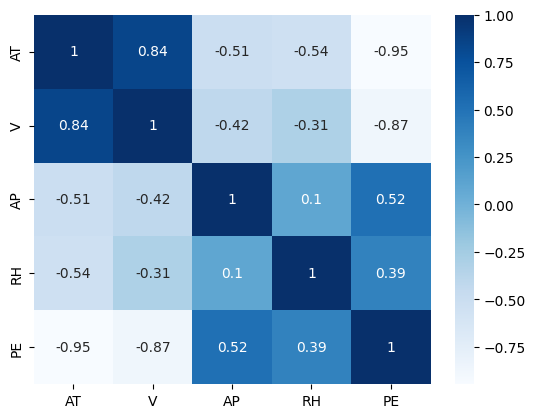

In [5]:
##plotting heatmap:
sns.heatmap(data.corr(), cmap='Blues',annot=True);

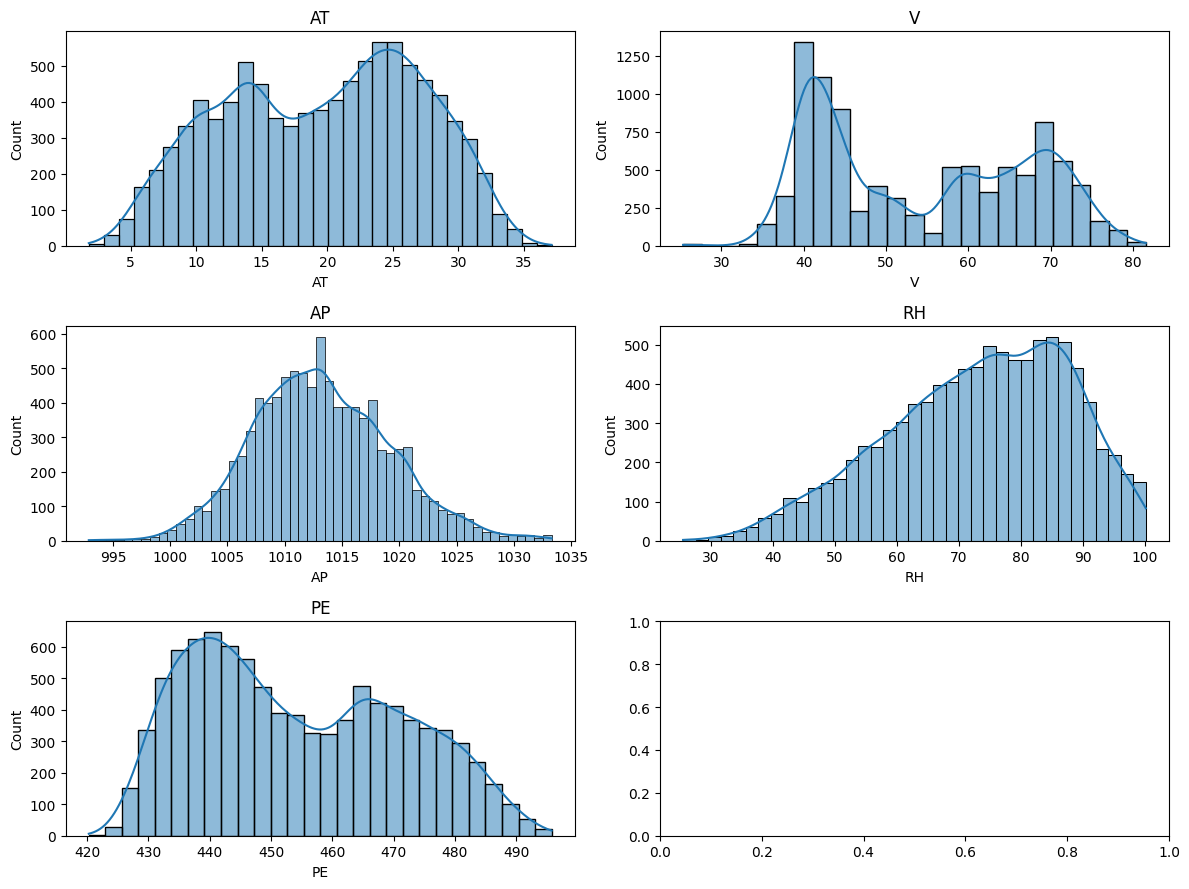

In [6]:
## ploting histplot:

num_rows = 3
num_cols = 2

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

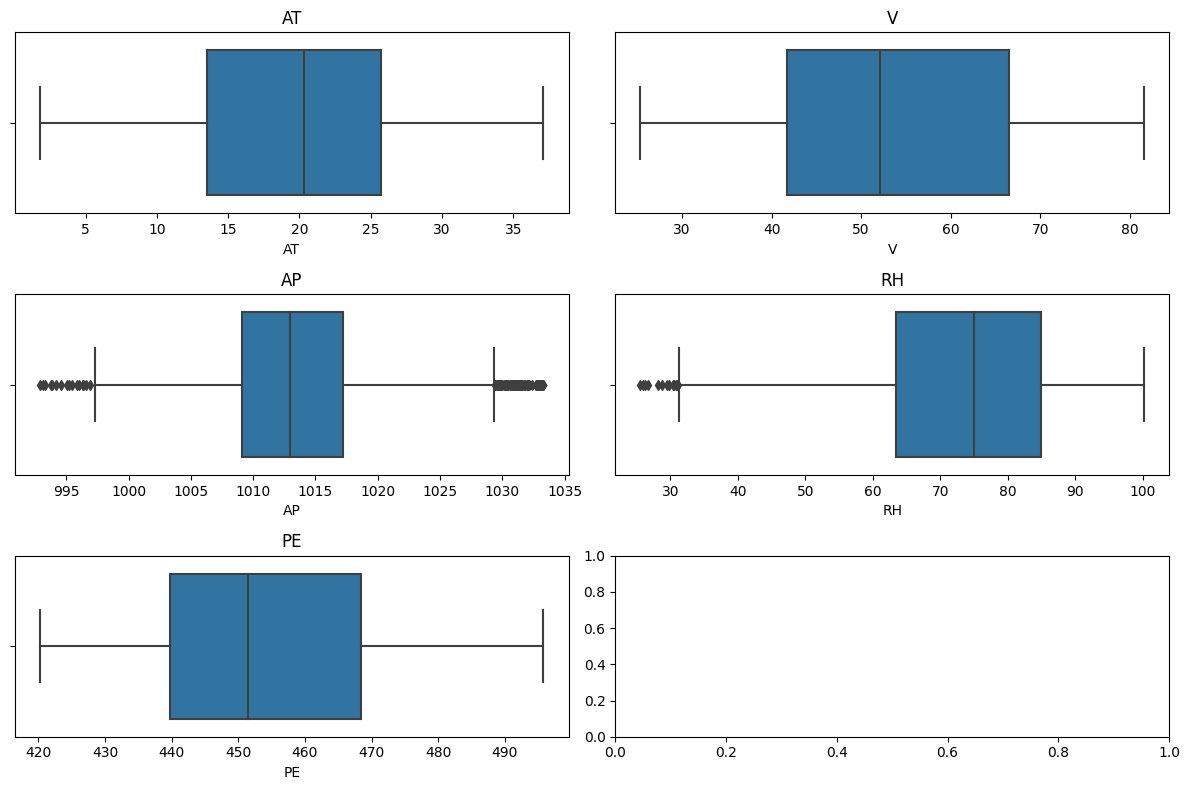

In [7]:
num_rows = 3
num_cols = 2

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.boxplot(data=data,x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [8]:
## spliting data into features and target values:
x = data.drop("PE",axis =1)
y = data["PE"]
print(f"shape of feature dataset:{x.shape}")
print(f"shape of target dataset:{y.shape}")

shape of feature dataset:(9527, 4)
shape of target dataset:(9527,)


In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9527.0,19.658225,7.444397,1.81,13.530,20.35,25.71,37.11
V,9527.0,54.293421,12.686309,25.36,41.740,52.08,66.51,81.56
AP,9527.0,1013.237084,5.940526,992.89,1009.085,1012.92,1017.20,1033.30
RH,9527.0,73.334951,14.607513,25.56,63.375,75.00,84.85,100.16


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

shape of x_train(7621, 4) and have dimension: 2
shape of y_train(7621,) and have dimension: 1
shape of x_test(1906, 4)  and have dimension: 2
shape of y_test(1906,) and have dimension: 2


In [16]:
from  sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



## setting parameters:
# Define the hyperparameter grid
param_grid = {"criterion" : ['squared_error','absolute_error', ],
              "splitter"  : ['best', 'random'],
              "max_depth" : range(5,20,5),
              "min_samples_split" : range(2,10,2),
              "min_samples_leaf" :range(2,10,2),
              "max_features" : ['sqrt']            }



DTR = DecisionTreeRegressor()
# Create the GridSearchCV object
grid_search = GridSearchCV(DTR, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2)

'''
## training the model:

trained_model = grid_search.fit(x_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params
'''

'\n## training the model:\n\ntrained_model = grid_search.fit(x_train, y_train)\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\nbest_params\n'

```

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}
```

In [22]:
# fitting dtc model:

from sklearn.tree import DecisionTreeRegressor

# Define hyperparameters
parameters = {
    'criterion': 'squared_error',  # Change to 'mse' for Mean Squared Error
    'max_depth': 5,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'splitter': 'best'
}

# Create and fit the Decision Tree Regressor model
model = DecisionTreeRegressor(**parameters, random_state=0)


In [25]:
# Training model:
dtr_model = model.fit(x_train, y_train)

## model prediction:
y_pred = dtr_model.predict(x_test)

In [28]:
## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""



prediction_result = []
Squared_difference = []
absolute_difference = []
j=0
for i in y_test:
    diff = i - y_pred[j]
    prediction_result.append(round(diff,2))
    j = j+1

for i in prediction_result:
    mse = i*i
    Squared_difference.append(mse)
    absolute_difference.append(abs(i))


prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : (np.round(y_pred,2)) , "(Actual-preds)" : prediction_result, "Squared_difference":np.round(Squared_difference,2), 'absolute_difference': absolute_difference })


y_pred dimensions : 1
y_test dimension : 1


In [31]:
prediction_table.sample(50)

,Actual,Predict,(Actual-preds),Squared_difference,absolute_difference
5055,428.60,432.58,-3.98,15.84,3.98
5690,481.38,480.54,0.84,0.71,0.84
1188,436.89,432.58,4.31,18.58,4.31
5235,461.91,465.30,-3.39,11.49,3.39
5160,433.39,432.58,0.81,0.66,0.81
3283,456.25,461.14,-4.89,23.91,4.89
2948,437.96,437.44,0.52,0.27,0.52
2926,445.81,442.32,3.49,12.18,3.49
4653,483.17,480.54,2.63,6.92,2.63
3089,488.69,480.54,8.15,66.42,8.15


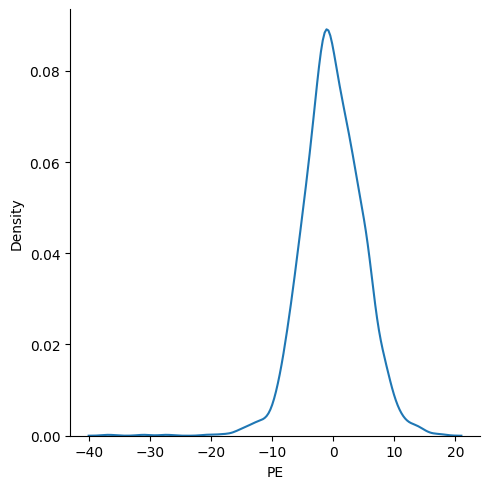

In [33]:
residual = y_test - y_pred
sns.displot(residual,kind="kde");

In [34]:
## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test,y_pred)
print(f"mean_square_error : {mse}")


## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error:{(rmse)}")


## performance matric mean absolute error:
mae = mae(y_test,y_pred)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error : {rounded_mae}")


mean_square_error : 24.08440631705565
Root_mean_squared_error:4.907586608207302
mean_absolute_error : 3.8


In [35]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
p=8
n=len(y_test)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")

R-squared: 0.9180506828961043
Adjusted R-squared: 0.92


---
---